In [0]:
import tensorflow as tf;
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras;

In [0]:
def one_hot(arr):
  targets = np.array(arr).reshape(-1)
  return np.eye(10)[targets]

In [0]:
fashion_mnist=tf.keras.datasets.fashion_mnist;
(xt_train,yt_train),(xt_test,yt_test)=fashion_mnist.load_data()

classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

x_train=np.reshape(xt_train,(xt_train.shape[0],784))
y_train=one_hot(yt_train)

x_test=np.reshape(xt_test,(xt_test.shape[0],784))
y_test=one_hot(yt_test)

X=tf.placeholder('float')
Y=tf.placeholder('float')

batch_size=1000

9
0
3
2
7
5
1
6
4
8


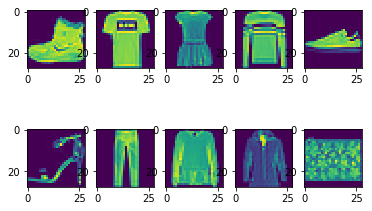

In [28]:
temp=[]
j=1
for i in range(0,yt_train.shape[0]):
  if yt_train[i] not in temp:
    temp.append(yt_train[i])
    plt.subplot(2,5,j)
    plt.imshow(xt_train[i])
    print(yt_train[i])
    j=j+1

In [0]:
nn1=500
nn2=500
nn3=500
ol=10

hidden_layer1={
    'weights':tf.Variable(tf.random_normal([784,nn1]),dtype=tf.float32),
    'bias':tf.Variable(tf.ones([1,nn1]),dtype=tf.float32)
}

hidden_layer2={
    'weights':tf.Variable(tf.random_normal([nn1,nn2]),dtype=tf.float32),
    'bias':tf.Variable(tf.ones([1,nn2]),dtype=tf.float32)
}

hidden_layer3={
    'weights':tf.Variable(tf.random_normal([nn2,nn3]),dtype=tf.float32),
    'bias':tf.Variable(tf.ones([1,nn3]),dtype=tf.float32)
}

output_layer={
    'weights':tf.Variable(tf.random_normal([nn3,ol]),dtype=tf.float32),
    'bias':tf.Variable(tf.ones([1,ol]),dtype=tf.float32)
}

In [0]:
def forward_propogation(X):
  layer1=tf.sigmoid(tf.matmul(X,hidden_layer1['weights'])+hidden_layer1['bias'])
  layer2=tf.sigmoid(tf.matmul(layer1,hidden_layer2['weights'])+hidden_layer2['bias'])
  layer3=tf.sigmoid(tf.matmul(layer2,hidden_layer3['weights'])+hidden_layer3['bias'])
  output=tf.matmul(layer3,output_layer['weights'])+output_layer['bias']
  return output

In [0]:
def training_model(X,Y):
  predicted_values=forward_propogation(X)
  
  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predicted_values,labels=Y))
  
  optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)
  
  total_epochs=100
  nbatches=int(x_train.shape[0]/batch_size)
  
  with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(0,100):
      epoch_loss=0
      for j in range(0,nbatches):
        x=x_train[j*batch_size:(j+1)*batch_size]
        y=y_train[j*batch_size:(j+1)*batch_size]
        
        _,c=sess.run([optimizer,cost],feed_dict={X:x,Y:y})
        epoch_loss+=c
      if i%10==0:
        print('Epoch Loss for epoch no ',i,' : ',c)
    
    pre=tf.argmax(predicted_values,1)
    tes=tf.argmax(Y,1)
    check=tf.equal(pre,tes)
    accuracy=tf.reduce_mean(tf.cast(check,tf.float32))
    
    acc,pr,te=sess.run([accuracy,pre,tes],feed_dict={X:x_test,Y:y_test})
    print("Accuracy: ",acc)

In [32]:
training_model(X,Y)

Epoch Loss for epoch no  0  :  2.3603082
Epoch Loss for epoch no  10  :  0.71236116
Epoch Loss for epoch no  20  :  0.53515965
Epoch Loss for epoch no  30  :  0.5105397
Epoch Loss for epoch no  40  :  0.48005128
Epoch Loss for epoch no  50  :  0.46681434
Epoch Loss for epoch no  60  :  0.43389076
Epoch Loss for epoch no  70  :  0.44836816
Epoch Loss for epoch no  80  :  0.42669305
Epoch Loss for epoch no  90  :  0.3903013
Accuracy:  0.8203
